In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [ ]:
model = YOLO('/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/yolo11s-seg.pt')

In [ ]:
import yaml

yaml_file_path = '/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/data.yaml'

with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['Pothole'], 'roboflow': {'workspace': 'farzad', 'project': 'pothole_segmentation_yolov8', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/farzad/pothole_segmentation_yolov8/dataset/1'}}


In [ ]:
names=['Pothole']

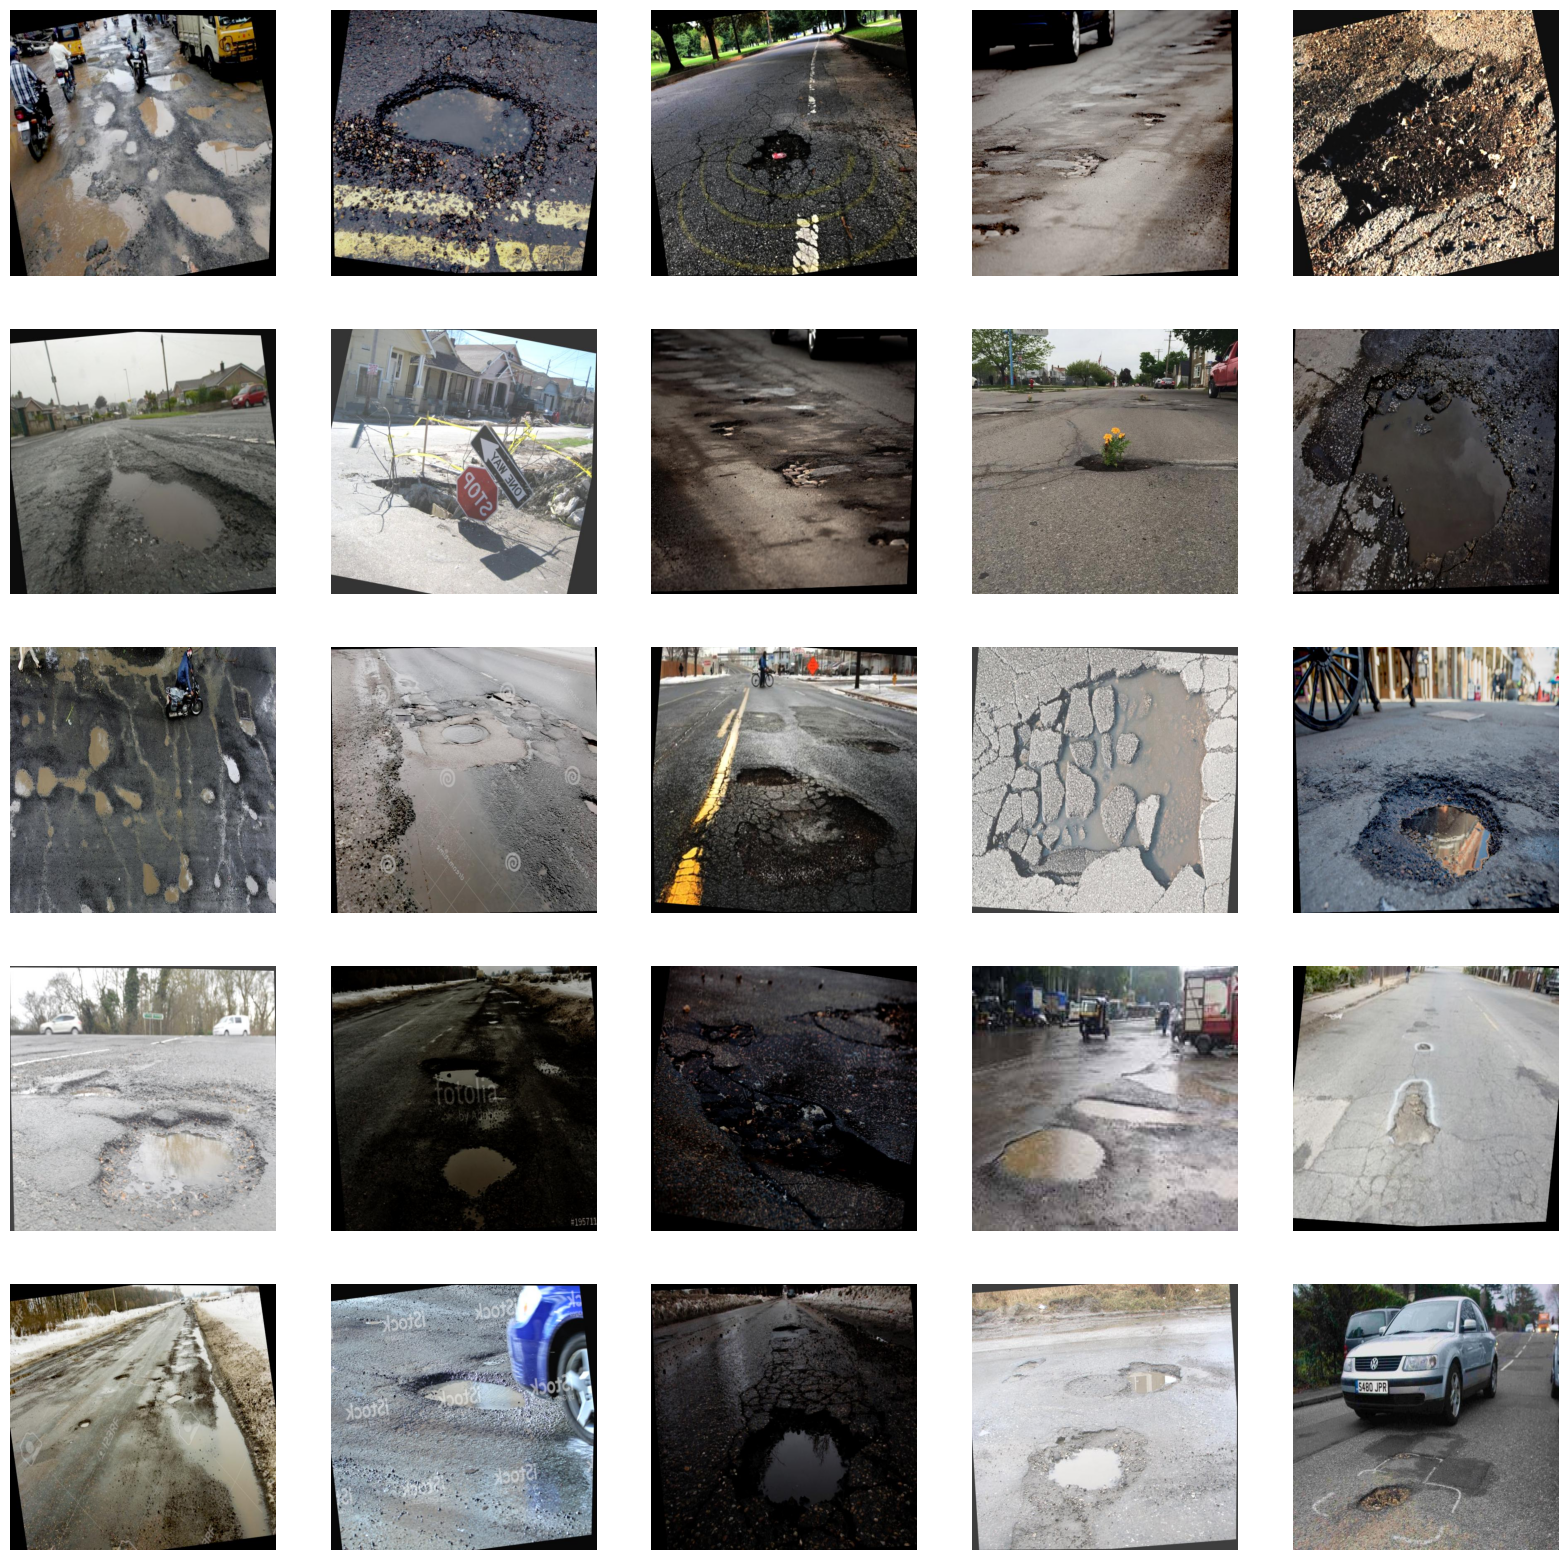

In [ ]:
import random
import cv2
import os
import matplotlib.pyplot as plt

image_dir = '/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/train/images'
image_files = os.listdir(image_dir)
random_image_file = random.choice(image_files)
img_path = os.path.join(image_dir, random_image_file)

random_images = random.sample(image_files, 25)
label_files = '/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/train/labels'
fig, axs = plt.subplots(5, 5, figsize=(20,20))

for i, image_file in enumerate(random_images):
    row = i // 5
    col = i % 5
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_files, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255,0), 3)
        classe=names[int(class_id)]
        cv2.putText(image, classe, (x_min, y_min -5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 2, cv2.LINE_AA)


    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
dataset_path='/content/drive/MyDrive/Pothole_Segmentation_YOLOv8'
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

num_train_images = 0
num_valid_images = 0

train_image_sizes = set()
valid_image_sizes = set()

for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images+=1
        image_path=os.path.join(valid_images_path,filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)


print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 728
Number of validation images: 60
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


In [ ]:
results = model.train(
    data=yaml_file_path,
    epochs=137,
    imgsz=640,
    patience=15,
    batch=16,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device=0,
    seed=42)

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/yolo11s-seg.pt, data=/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/data.yaml, epochs=137, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 228MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Pothole_Segmentation_YOLOv8/train/labels... 720 images, 8 backgrounds, 0 corrupt: 100%|██████████| 728/728 [10:06<00:00,  1.20it/s]


train: New cache created: /content/drive/MyDrive/Pothole_Segmentation_YOLOv8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:54<00:00,  1.11it/s]

val: New cache created: /content/drive/MyDrive/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 137 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/137      5.41G      1.527      2.901      2.064      1.481         27        640: 100%|██████████| 46/46 [00:39<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        201      0.556      0.398      0.387      0.187      0.523      0.368      0.299       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/137      5.28G      1.618      2.712      1.707      1.549         25        640: 100%|██████████| 46/46 [00:34<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         60        201      0.134      0.109     0.0305     0.0132      0.129      0.119     0.0278    0.00996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/137      5.37G      1.681      2.723      1.716      1.578         53        640: 100%|██████████| 46/46 [00:29<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         60        201      0.212      0.124     0.0695     0.0298       0.25      0.124      0.071     0.0327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/137      5.31G      1.681      2.756      1.727      1.604         23        640: 100%|██████████| 46/46 [00:25<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.244      0.159      0.106     0.0563      0.255      0.154      0.105     0.0541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/137      5.36G      1.614      2.637      1.667      1.524         27        640: 100%|██████████| 46/46 [00:34<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         60        201      0.458      0.418      0.384      0.171      0.435      0.398       0.36      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/137      5.28G      1.583      2.551      1.558      1.521         33        640: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         60        201      0.514      0.448      0.439      0.214      0.514      0.448      0.442      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/137      5.28G      1.552      2.472      1.539      1.481         30        640: 100%|██████████| 46/46 [00:34<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         60        201      0.485      0.532      0.477      0.236      0.518      0.557      0.504      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/137      5.28G      1.541        2.5      1.507      1.494         43        640: 100%|██████████| 46/46 [00:36<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         60        201      0.506      0.493      0.495      0.248      0.514      0.483      0.497      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/137      5.27G       1.44      2.414      1.418      1.427         34        640: 100%|██████████| 46/46 [00:34<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         60        201      0.603      0.596      0.555      0.281      0.602      0.595      0.576      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/137      5.32G      1.443       2.36      1.384      1.417         27        640: 100%|██████████| 46/46 [00:32<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         60        201      0.574      0.522      0.513      0.271      0.601       0.54      0.525      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/137      5.28G      1.402      2.336      1.299       1.39         22        640: 100%|██████████| 46/46 [00:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         60        201      0.532      0.587      0.507      0.257      0.574      0.577      0.558      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/137      5.28G      1.437       2.34      1.338      1.425         32        640: 100%|██████████| 46/46 [00:35<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.666      0.545      0.619      0.331      0.651      0.567      0.611      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/137      5.31G       1.42      2.249      1.287      1.396         39        640: 100%|██████████| 46/46 [00:26<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        201      0.484      0.552       0.51      0.263       0.47      0.535      0.493       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/137      5.22G      1.396      2.304       1.32      1.396         24        640: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         60        201      0.657      0.547      0.586      0.304      0.652      0.557      0.582      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/137      5.28G       1.36      2.253      1.257      1.349         31        640: 100%|██████████| 46/46 [00:37<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         60        201      0.578      0.617      0.583       0.29      0.583      0.622      0.576      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/137      5.31G      1.336      2.178      1.193      1.341         23        640: 100%|██████████| 46/46 [00:32<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         60        201      0.557      0.632      0.616      0.326      0.599      0.627      0.644      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/137      5.29G       1.33       2.14      1.198      1.342         39        640: 100%|██████████| 46/46 [00:31<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         60        201      0.619      0.542      0.557      0.282      0.594      0.522      0.528      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/137      5.26G      1.328      2.169      1.166      1.314         26        640: 100%|██████████| 46/46 [00:35<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         60        201      0.715      0.567      0.607       0.32      0.709      0.567      0.618      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/137      5.27G      1.334      2.178      1.176      1.331         35        640: 100%|██████████| 46/46 [00:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         60        201      0.666      0.657      0.679       0.37      0.632      0.692      0.686       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/137      5.32G      1.327      2.165      1.157      1.332         41        640: 100%|██████████| 46/46 [00:34<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        201      0.605      0.662      0.627      0.327      0.614      0.672      0.639      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/137      5.26G      1.276       2.12      1.134      1.307         33        640: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         60        201      0.682       0.65      0.647      0.365      0.687      0.634      0.641       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/137      5.29G      1.305      2.155      1.156      1.314         51        640: 100%|██████████| 46/46 [00:30<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         60        201      0.677      0.542      0.605      0.325       0.68      0.539      0.613      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/137      5.31G      1.284      2.112      1.153      1.298         23        640: 100%|██████████| 46/46 [00:34<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        201      0.654      0.662      0.651       0.35       0.67      0.662      0.677      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/137      5.26G       1.28      2.019      1.082      1.293         31        640: 100%|██████████| 46/46 [00:34<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        201      0.668      0.637      0.651      0.337      0.698      0.608      0.653      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/137      5.32G      1.233      2.032      1.073      1.266         35        640: 100%|██████████| 46/46 [00:35<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         60        201      0.632      0.599      0.605      0.316      0.638      0.615      0.633      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/137       5.3G      1.274      2.058      1.087      1.286         32        640: 100%|██████████| 46/46 [00:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         60        201      0.599      0.602      0.592      0.326      0.606      0.605       0.58      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/137      5.28G       1.24      1.996      1.052      1.281         40        640: 100%|██████████| 46/46 [00:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         60        201      0.675      0.691      0.665      0.334      0.688      0.703      0.692      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/137      5.32G      1.253       1.99      1.037       1.28         24        640: 100%|██████████| 46/46 [00:35<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         60        201       0.78      0.572      0.664       0.36      0.807      0.592      0.691      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/137      5.28G      1.213      1.971      1.009      1.252         42        640: 100%|██████████| 46/46 [00:24<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         60        201      0.643      0.612      0.654      0.352      0.648      0.617      0.659      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/137      5.29G      1.258      2.018      1.063      1.287         26        640: 100%|██████████| 46/46 [00:38<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         60        201      0.687      0.622      0.674      0.364      0.693      0.628      0.683      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/137      5.35G      1.219      1.948     0.9848      1.246         34        640: 100%|██████████| 46/46 [00:35<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        201      0.665      0.662      0.677      0.367      0.676      0.666      0.679      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/137      5.24G      1.164      1.897     0.9494      1.218         45        640: 100%|██████████| 46/46 [00:33<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.744      0.597      0.668      0.372      0.748      0.597      0.676      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/137      5.32G      1.166      1.963     0.9884      1.232         26        640: 100%|██████████| 46/46 [00:37<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         60        201      0.665      0.682      0.677      0.379      0.675      0.692      0.697      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/137      5.28G      1.157      1.878     0.9465      1.219         36        640: 100%|██████████| 46/46 [00:33<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        201      0.689      0.606      0.659      0.372      0.713       0.63      0.686      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/137      5.26G      1.179      1.927     0.9777       1.24         27        640: 100%|██████████| 46/46 [00:32<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all         60        201      0.559      0.711       0.66       0.38      0.555      0.706       0.66      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/137      5.33G      1.174       1.85     0.9339      1.226         35        640: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        201      0.635      0.624      0.625      0.352      0.651      0.622      0.647      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/137      5.32G      1.194      1.953     0.9948      1.244         54        640: 100%|██████████| 46/46 [00:26<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         60        201      0.669      0.682      0.682      0.397      0.678      0.692      0.689      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/137      5.28G      1.133      1.851     0.9193      1.199         28        640: 100%|██████████| 46/46 [00:37<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         60        201      0.739      0.621      0.677      0.387      0.751      0.629      0.698      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/137      5.25G      1.155       1.81     0.8968      1.214         37        640: 100%|██████████| 46/46 [00:34<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         60        201      0.635      0.682      0.674      0.398       0.68      0.692      0.713      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/137      5.25G      1.124      1.818     0.8818        1.2         26        640: 100%|██████████| 46/46 [00:32<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         60        201      0.708      0.652      0.679      0.388      0.718      0.671      0.683      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/137      5.31G      1.104      1.789     0.8669      1.177         43        640: 100%|██████████| 46/46 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all         60        201      0.692      0.567      0.635      0.364      0.722      0.594      0.661      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/137      5.22G      1.112      1.778     0.8949      1.198         18        640: 100%|██████████| 46/46 [00:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         60        201      0.613      0.669      0.666      0.383      0.622      0.677      0.686      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/137      5.26G      1.103      1.812     0.8942      1.206         37        640: 100%|██████████| 46/46 [00:31<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         60        201      0.682      0.701      0.731      0.413      0.702      0.716      0.747      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/137      5.32G      1.107      1.808     0.8527      1.188         34        640: 100%|██████████| 46/46 [00:24<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.651      0.652      0.664      0.377      0.706      0.617      0.671      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/137      5.29G      1.091      1.802     0.8649      1.174         30        640: 100%|██████████| 46/46 [00:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         60        201      0.685      0.713      0.703      0.411      0.679      0.705      0.706       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/137       5.3G      1.105      1.799     0.8414      1.174         26        640: 100%|██████████| 46/46 [00:32<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         60        201      0.732      0.597      0.677      0.385      0.752      0.612      0.707      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/137      5.28G       1.08      1.724     0.8025      1.163         28        640: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         60        201      0.709      0.657      0.707      0.406      0.723      0.662      0.725      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/137      5.28G      1.087      1.736     0.8299      1.172         34        640: 100%|██████████| 46/46 [00:39<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all         60        201      0.706      0.637      0.687      0.393       0.75      0.612      0.698      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/137      5.25G      1.084      1.775     0.8568      1.177         38        640: 100%|██████████| 46/46 [00:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         60        201      0.686      0.597      0.648      0.375      0.701      0.607      0.659      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/137      5.26G      1.052      1.697      0.794      1.158         36        640: 100%|██████████| 46/46 [00:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.684      0.637      0.695      0.385      0.711       0.65      0.712      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/137      5.27G      1.048      1.709      0.769      1.152         45        640: 100%|██████████| 46/46 [00:30<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         60        201      0.671      0.721      0.711       0.42      0.682      0.741      0.734      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/137      5.28G      1.026      1.664     0.7705      1.126         39        640: 100%|██████████| 46/46 [00:30<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         60        201      0.653      0.672      0.679        0.4      0.656      0.682      0.681      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/137      5.28G      1.062      1.739     0.7758      1.155         26        640: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         60        201      0.708      0.652      0.704      0.395      0.714      0.657      0.712      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/137      5.33G      1.049       1.73     0.7834       1.14         32        640: 100%|██████████| 46/46 [00:30<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         60        201       0.72      0.657      0.696      0.405      0.753      0.622      0.693      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/137       5.3G      1.043      1.716     0.7852      1.152         44        640: 100%|██████████| 46/46 [00:35<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         60        201      0.734      0.602      0.663      0.394      0.734      0.602      0.669      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/137      5.26G       1.04      1.679     0.7596      1.154         25        640: 100%|██████████| 46/46 [00:37<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        201      0.646      0.687      0.696      0.394      0.641      0.682       0.69      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/137      5.25G      1.013      1.672     0.7737      1.139         30        640: 100%|██████████| 46/46 [00:35<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.581      0.717      0.651      0.382      0.593      0.716      0.661       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/137      5.26G       1.02       1.67     0.7635      1.136         31        640: 100%|██████████| 46/46 [00:33<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         60        201      0.673      0.632      0.677      0.389      0.695      0.652      0.699      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/137      5.26G       1.03      1.685     0.7922      1.141         33        640: 100%|██████████| 46/46 [00:29<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         60        201      0.671      0.622      0.631      0.372      0.703      0.632      0.657      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/137      5.24G       1.04       1.67     0.7808      1.156         36        640: 100%|██████████| 46/46 [00:27<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60        201      0.624      0.719      0.694      0.411      0.694      0.655      0.701      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/137      5.27G      1.013      1.636     0.7452      1.118         26        640: 100%|██████████| 46/46 [00:35<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         60        201      0.681      0.702      0.699      0.412      0.691      0.712      0.711      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/137      5.36G     0.9808      1.587     0.7377      1.112         32        640: 100%|██████████| 46/46 [00:25<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         60        201      0.777      0.643        0.7      0.404      0.806       0.66      0.725       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/137      5.28G     0.9877        1.6     0.7141        1.1         41        640: 100%|██████████| 46/46 [00:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.698      0.682      0.705      0.412      0.704      0.686      0.706      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/137       5.3G     0.9756      1.564     0.6997       1.11         22        640: 100%|██████████| 46/46 [00:36<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         60        201      0.739      0.675      0.705      0.426      0.744       0.68      0.711      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/137      5.29G     0.9662      1.586     0.7084      1.102         27        640: 100%|██████████| 46/46 [00:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        201      0.649      0.735      0.717       0.42      0.649      0.731      0.725      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/137      5.32G     0.9532      1.559     0.6978      1.101         18        640: 100%|██████████| 46/46 [00:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         60        201      0.686      0.716      0.719      0.412      0.715      0.723      0.741      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/137      5.29G     0.9657      1.581     0.7007      1.097         33        640: 100%|██████████| 46/46 [00:33<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         60        201      0.755      0.657      0.735      0.441      0.761      0.662      0.736      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/137      5.25G     0.9693       1.55     0.6968      1.103         50        640: 100%|██████████| 46/46 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         60        201      0.677      0.689      0.702      0.433      0.732      0.657      0.722      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/137      5.27G     0.9645      1.583      0.714      1.098         25        640: 100%|██████████| 46/46 [00:32<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         60        201      0.704      0.637      0.663      0.412      0.739      0.617      0.687      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/137      5.28G     0.9691      1.583     0.7024      1.092         37        640: 100%|██████████| 46/46 [00:31<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         60        201      0.613      0.607      0.602      0.356      0.618      0.612        0.6      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/137      5.25G     0.9943      1.616     0.7138      1.107         65        640: 100%|██████████| 46/46 [00:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         60        201      0.661      0.679      0.675      0.396      0.679      0.695      0.709      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/137      5.26G     0.9822      1.627     0.7047      1.107         27        640: 100%|██████████| 46/46 [00:26<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        201      0.665      0.702      0.689      0.417      0.679      0.697      0.712      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/137      5.29G     0.9466      1.542     0.6992      1.089         26        640: 100%|██████████| 46/46 [00:25<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         60        201      0.674      0.697      0.707       0.44      0.758      0.622      0.704       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/137      5.24G     0.9275      1.546     0.6784      1.085         38        640: 100%|██████████| 46/46 [00:24<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         60        201      0.717      0.672      0.709      0.424      0.714      0.682      0.723      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/137      5.24G     0.9278      1.521     0.6498      1.072         32        640: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         60        201      0.692      0.694      0.723      0.428      0.697      0.698      0.741      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/137      5.25G     0.9447      1.547     0.6606      1.086         29        640: 100%|██████████| 46/46 [00:25<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         60        201      0.735      0.705      0.726      0.451      0.742      0.711      0.738      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/137      5.28G     0.9034      1.485     0.6268      1.067         42        640: 100%|██████████| 46/46 [00:25<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         60        201      0.678      0.639      0.703      0.419      0.764      0.596      0.718      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/137      5.32G     0.8949      1.477     0.6428      1.067         40        640: 100%|██████████| 46/46 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.678      0.706      0.689      0.418      0.718      0.721      0.719      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/137      5.24G     0.9099      1.487     0.6566      1.069         20        640: 100%|██████████| 46/46 [00:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         60        201      0.775      0.564      0.671      0.414      0.789      0.578      0.678      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/137      5.28G     0.9114      1.494     0.6659      1.067         45        640: 100%|██████████| 46/46 [00:23<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60        201      0.757      0.602        0.7      0.445       0.77      0.617      0.715      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/137      5.34G     0.8801      1.434     0.6194      1.066         57        640: 100%|██████████| 46/46 [00:25<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         60        201       0.69      0.622      0.676      0.415      0.715      0.632      0.697      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/137      5.25G     0.8792      1.455     0.6138      1.061         48        640: 100%|██████████| 46/46 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         60        201      0.695      0.657      0.675      0.392      0.704      0.647      0.678      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/137      5.26G     0.9065      1.483     0.6177      1.062         25        640: 100%|██████████| 46/46 [00:24<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         60        201      0.707      0.672      0.689      0.399      0.707      0.672      0.696      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/137      5.22G      0.871      1.458     0.6306      1.063         23        640: 100%|██████████| 46/46 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        201      0.671      0.692      0.698      0.435      0.682      0.701      0.705      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/137       5.3G     0.9019      1.488     0.6419      1.065         39        640: 100%|██████████| 46/46 [00:24<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         60        201      0.735      0.657      0.705      0.431      0.753      0.672      0.723      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/137      5.21G      0.882      1.421     0.5877      1.049         48        640: 100%|██████████| 46/46 [00:24<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         60        201       0.69      0.647      0.697      0.426      0.691      0.706      0.719      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/137      5.34G     0.8514      1.391     0.5792      1.034         38        640: 100%|██████████| 46/46 [00:25<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         60        201      0.715      0.667       0.71      0.426      0.725      0.677      0.727      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/137      5.21G     0.8765      1.444      0.619      1.045         35        640: 100%|██████████| 46/46 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         60        201      0.757      0.651      0.714      0.418      0.758      0.657      0.735      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/137       5.3G     0.8602      1.389     0.5885      1.041         46        640: 100%|██████████| 46/46 [00:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         60        201      0.707      0.706      0.705      0.424      0.722       0.71      0.706      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/137      5.23G     0.8718      1.434     0.6011       1.05         50        640: 100%|██████████| 46/46 [00:24<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60        201      0.695      0.657      0.665      0.409        0.7      0.662      0.664      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/137      5.26G     0.8611      1.417     0.6026      1.054         35        640: 100%|██████████| 46/46 [00:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         60        201      0.702      0.692       0.71      0.434      0.702      0.692      0.707      0.419
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 76, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



91 epochs completed in 0.878 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


                   all         60        201      0.734      0.706      0.726       0.45      0.739      0.711      0.739       0.43
Speed: 0.2ms preprocess, 6.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/train


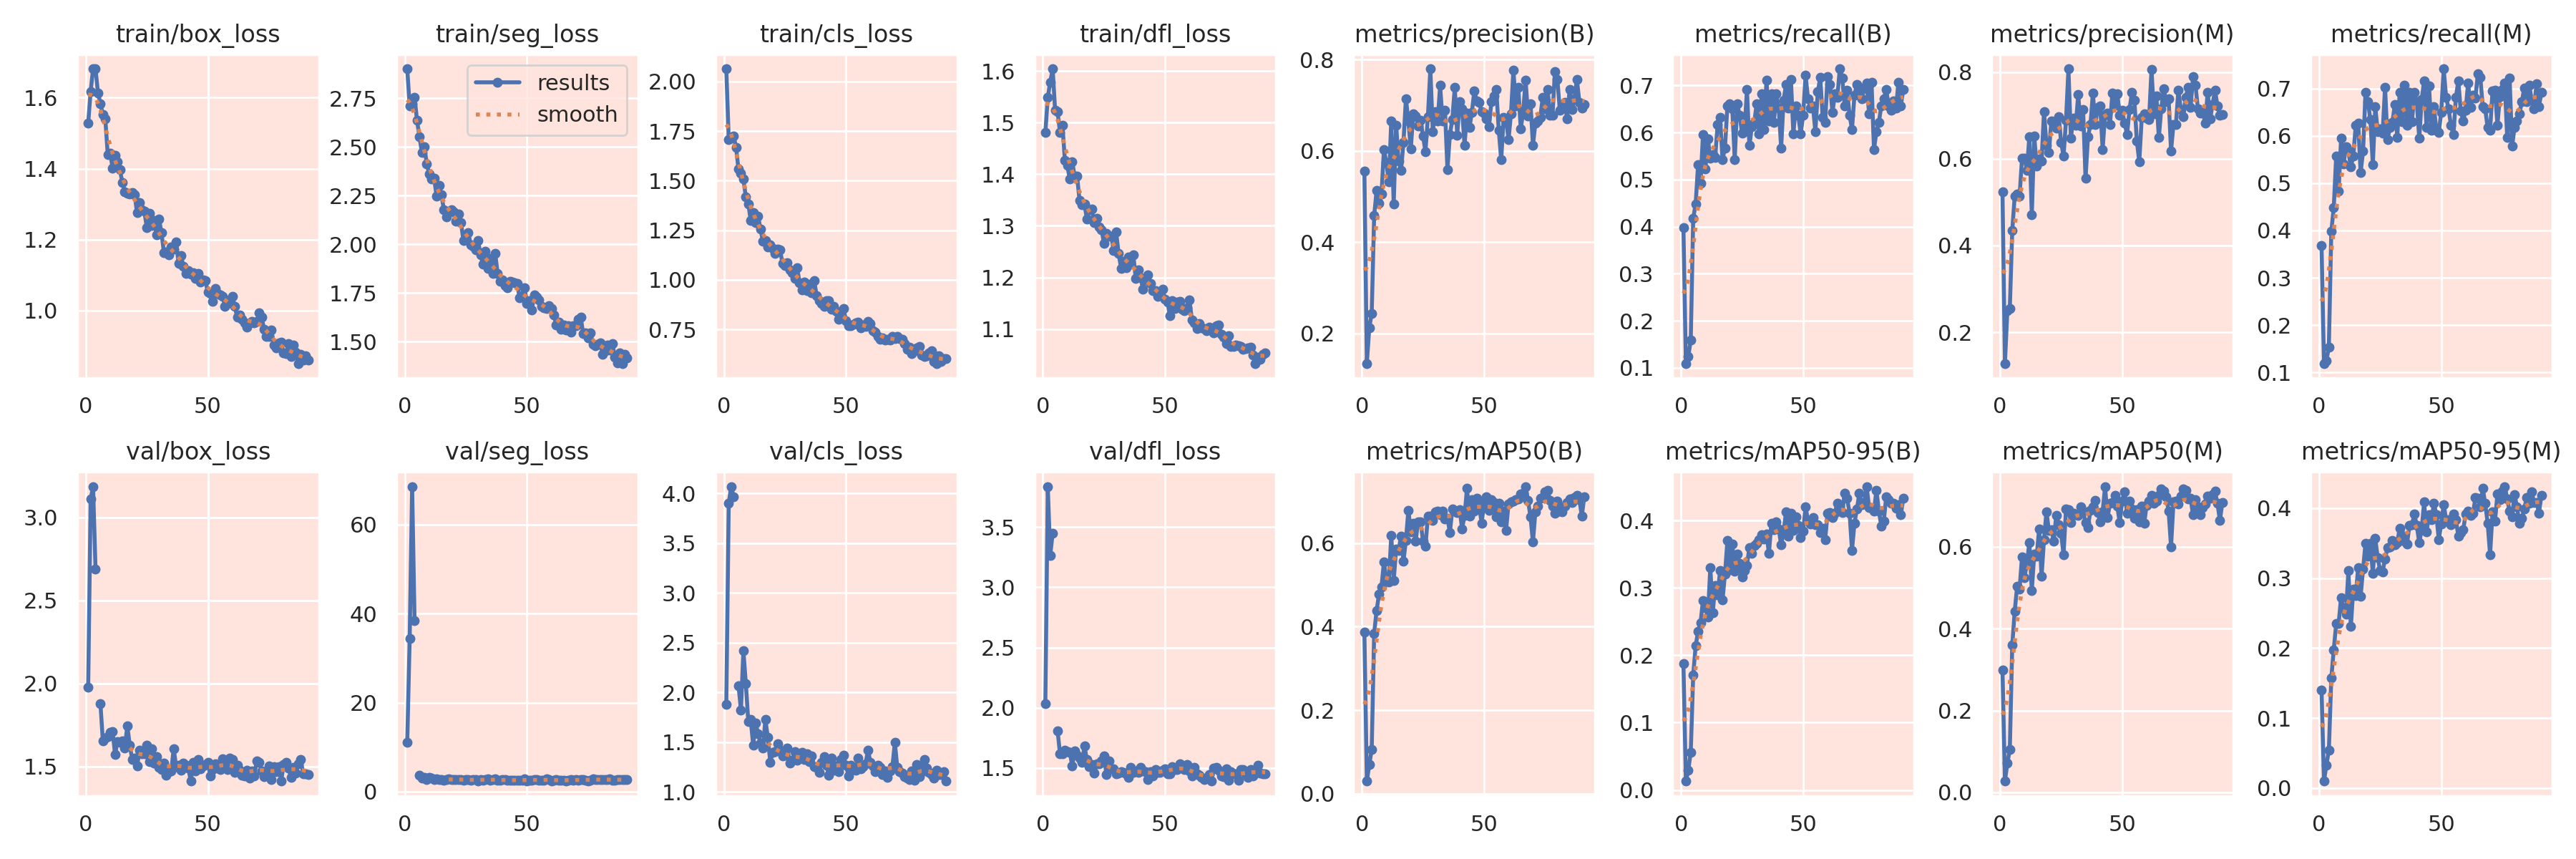

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/segment/train/results.png', width=1000))

In [ ]:
xbest_model_path ='/content/runs/segment/train/weights/best.pt'

best_model = YOLO(best_model_path)

metrics = best_model.val(split='val')
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")
print("recall : ",metrics.box.r)
print(metrics.box.f1)
print(metrics.box.maps)

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning /content/drive/MyDrive/Pothole_Segmentation_YOLOv8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


                   all         60        201      0.736      0.701      0.726      0.451      0.746      0.711      0.738      0.429
Speed: 0.7ms preprocess, 34.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/val
Mean Average Precision @.5:.95 : 0.45112614444513843
Mean Average Precision @ .50   : 0.726022632153836
Mean Average Precision @ .70   : 0.4992469645210378
recall :  [    0.70149]
[    0.71836]
[    0.45113]


In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

metrics_df.round(3)

In [ ]:
image_dir = "/content/drive/MyDrive/Pothole_Segmentation_YOLOv8/valid/images"

all_images = os.listdir(image_dir)
selected_images = all_images[:45]

for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name)
    results = best_model.predict(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for result in results:
        plotted_img = result.plot()
        plt.figure(figsize=(10,9))
        plt.imshow(plotted_img)
        plt.axis('off')
        plt.show()